# 1. Import Created Class

In [3]:
from My_Module.readdataframe import ReadDataFrame
from My_Module.mytfidfvectorizer import MyTfidfVectorizer,SetLabel
from My_Module.createviewmodel import CreateModel
from My_Module.createmymodel import *
from My_Module.comparemodels import CompareModels

# 2. Read Dataset

In [4]:
#Reading Preprocessed dataset
df_obj = ReadDataFrame("df")
df_obj.set_df("PreprocessedDatasets/Final_Preprocessed_df123456.csv")
my_df = df_obj.get_df()
my_df.head(2)

,label,tweet,tokenized_tweet,preproc_step_1,preproc_step_2,preproc_step_3,preproc_step_4,preproc_step_5,preproc_step_6,preproc_step_7,preproc_step_8
0,0,not long to go till #bakugp have fun everybody...,"['not', 'long', 'to', 'go', 'till', 'bakugp', ...","['not', 'long', 'to', 'go', 'till', 'bakugp', ...","['not', 'long', 'to', 'go', 'till', 'bakugp', ...","['long', 'till', 'bakugp', 'fun', 'everybody',...","['long', 'till', 'bakugp', 'fun', 'everybody',...","['long', 'till', 'bakugp', 'fun', 'everybody',...","['long', 'till', 'bakugp', 'fun', 'everybody',...","['long', 'till', 'bakugp', 'fun', 'everybody',...",long till bakugp fun everybody race europegp
1,0,#pocohontas i hope she is picked as vp. it wil...,"['pocohontas', 'i', 'hope', 'she', 'is', 'pick...","['pocohontas', 'i', 'hope', 'she', 'is', 'pick...","['pocohontas', 'i', 'hope', 'she', 'is', 'pick...","['pocohontas', 'hope', 'picked', 'vp', 'happen...","['pocohontas', 'hope', 'picked', 'vp', 'happen...","['pocohontas', 'hope', 'picked', 'vp', 'happen...","['pocohonta', 'hope', 'pick', 'vp', 'happen', ...","['pocohonta', 'hope', 'pick', '', 'happen', 'l...",pocohonta hope pick happen lie heritage


# 3. Balance Dataset

Shape:  (19969, 11)


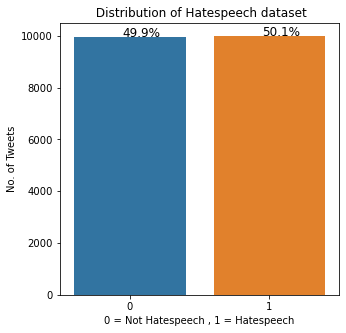

In [7]:
#Balance dataset
#print(my_df.groupby('label').count())
label0 =  my_df.loc[my_df.label==0][:10000]
label1 =  my_df.loc[my_df.label==1][:10000]
frames = [label0,label1]
df = pd.concat(frames)
from sklearn.utils import shuffle
my_df = shuffle(df)
my_df.reset_index(drop=True, inplace = True)
import seaborn as sns
import matplotlib.pyplot as plt

#function to show percentage 
def balance_df_view(df, x_axis):
    total = len(df)
    plt.rcParams["figure.figsize"] = (5,5)
    ax = sns.countplot( x= x_axis, data=df)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.title(" Distribution of Hatespeech dataset")
    plt.xlabel('0 = Not Hatespeech , 1 = Hatespeech')
    plt.ylabel('No. of Tweets')
    plt.show()

print("Shape: ",df.shape)
balance_df_view(df, 'label')


In [8]:
print("0 => ", my_df[my_df.label==0].count())
print("1 => ",my_df[my_df.label==1].count())
my_df

0 =>  label              9971
tweet              9971
tokenized_tweet    9971
preproc_step_1     9971
preproc_step_2     9971
preproc_step_3     9971
preproc_step_4     9971
preproc_step_5     9971
preproc_step_6     9971
preproc_step_7     9971
preproc_step_8     9971
dtype: int64
1 =>  label              9998
tweet              9998
tokenized_tweet    9998
preproc_step_1     9998
preproc_step_2     9998
preproc_step_3     9998
preproc_step_4     9998
preproc_step_5     9998
preproc_step_6     9998
preproc_step_7     9998
preproc_step_8     9998
dtype: int64


,label,tweet,tokenized_tweet,preproc_step_1,preproc_step_2,preproc_step_3,preproc_step_4,preproc_step_5,preproc_step_6,preproc_step_7,preproc_step_8
0,1,RT @oldgfatherclock: @YesYoureSexist @All_Hail...,"['RT', 'oldgfatherclock', 'YesYoureSexist', 'A...","['', 'oldgfatherclock', 'yesyouresexist', 'all...","['oldgfatherclock', 'yesyouresexist', 'all_hai...","['oldgfatherclock', 'yesyouresexist', 'all_hai...","['oldgfatherclock', 'yesyouresexist', 'all_hai...","['oldgfatherclock', 'yesyouresexist', 'all hai...","['oldgfatherclock', 'yesyouresexist', 'all', '...","['oldgfatherclock', 'yesyouresexist', 'all', '...",oldgfatherclock yesyouresexist all hailcaesar ...
1,1,Ibuki&#180;s shaved pussy fingered and fucked ...,"['Ibuki', '180', 's', 'shaved', 'pussy', 'fing...","['ibuki', '', 's', 'shaved', 'pussy', 'fingere...","['ibuki', 's', 'shaved', 'pussy', 'fingered', ...","['ibuki', 's', 'shaved', 'pussy', 'fingered', ...","['ibuki', 'shaved', 'pussy', 'fingered', 'fuck...","['ibuki', 'shaved', 'pussy', 'fingered', 'fuck...","['ibuki', 'shave', 'pussy', 'fingered', 'fuck'...","['ibuki', 'shave', 'pussy', 'fingered', 'fuck'...",ibuki shave pussy fingered fuck tight little r...
2,0,happy father's day.. #boys #father #sweet #l...,"['happy', 'father', ""'s"", 'day', 'boys', 'fath...","['happy', 'father', ""'s"", 'day', 'boys', 'fath...","['happy', 'father', ""'s"", 'day', 'boys', 'fath...","['happy', 'father', 'day', 'boys', 'father', '...","['happy', 'father', 'day', 'boys', 'father', '...","['happy', 'father', 'day', 'boys', 'father', '...","['happy', 'father', 'day', 'boy', 'father', 's...","['happy', 'father', 'day', 'boy', 'father', 's...",happy father day boy father sweet love memory
3,1,RT @micheleod1: #FlipTheSenate on the most cor...,"['RT', 'micheleod1', 'FlipTheSenate', 'on', 't...","['', 'micheleod1', 'flipthesenate', 'on', 'the...","['micheleod1', 'flipthesenate', 'on', 'the', '...","['micheleod1', 'flipthesenate', 'corrupt', 'ad...","['micheleod1', 'flipthesenate', 'corrupt', 'ad...","['micheleod ', 'flipthesenate', 'corrupt', 'ad...","['micheleod', ' ', 'flipthesenate', 'corrupt',...","['micheleod', ' ', 'flipthesenate', 'corrupt',...",micheleod flipthesenate corrupt administrati...
4,0,father's day to our real life super hero's n...,"['father', ""'s"", 'day', 'to', 'our', 'real', '...","['father', ""'s"", 'day', 'to', 'our', 'real', '...","['father', ""'s"", 'day', 'to', 'our', 'real', '...","['father', 'day', 'real', 'life', 'super', 'he...","['father', 'day', 'real', 'life', 'super', 'he...","['father', 'day', 'real', 'life', 'super', 'he...","['father', 'day', 'real', 'life', 'super', 'he...","['father', 'day', 'real', 'life', 'super', 'he...",father day real life super hero cape super pow...
...,...,...,...,...,...,...,...,...,...,...,...
19964,1,My main bitch is a ghost,"['My', 'main', 'bitch', 'is', 'a', 'ghost']","['my', 'main', 'bitch', 'is', 'a', 'ghost']","['my', 'main', 'bitch', 'is', 'a', 'ghost']","['main', 'bitch', 'ghost']","['main', 'bitch', 'ghost']","['main', 'bitch', 'ghost']","['main', 'bitch', 'ghost']","['main', 'bitch', 'ghost']",main bitch ghost
19965,0,i am thankful for saturdays. #thankful #positi...,"['i', 'am', 'thankful', 'for', 'saturdays', 't...","['i', 'am', 'thankful', 'for', 'saturdays', 't...","['i', 'am', 'thankful', 'for', 'saturdays', 't...","['thankful', 'saturdays', 'thankful', 'positive']","['thankful', 'saturdays', 'thankful', 'positive']","['thankful', 'saturdays', 'thankful', 'positive']","['thankful', 'saturday', 'thankful', 'positive']","['thankful', 'saturday', 'thankful', 'positive']",thankful saturday thankful positive
19966,0,great effo 2nite cavs.,"['great', 'effo', '2nite', 'cavs']","['great', 'effo', 'nite', 'cavs']","['great', 'effo', 'nite', 'cavs']","['great', 'effo', 'nite', 'cavs']","['great', 'effo', 'nite', 'cavs']","['great', 'effo', 'nite', 'cavs']","['great', 'effo', 'nite', 'cavs']","['great', 'effo', 'nite', 'cavs']",great effo nite cavs
19967,0,unfounately

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize.treebank import TreebankWordDetokenizer

def feat_ext_bag_of_words(df_tweet):
    count_vect = CountVectorizer(stop_words='english',min_df=1, max_features=3000, ngram_range=(1,2)) 
    #df_tweet1 = df_tweet.apply(TreebankWordDetokenizer().detokenize)
    bow_vec_matrix = count_vect.fit_transform(df_tweet.astype('U'))
    
    feature_names = count_vect.get_feature_names()
    print("Feature Length: ",len(sorted(feature_names)))
    #print(sorted(feature_names))
    print(len(sorted(feature_names)))
    return(bow_vec_matrix)
df_bow = feat_ext_bag_of_words(my_df['preproc_step_7'])
print(df_bow.toarray())
X1 = df_bow.toarray()
y1 = my_df['label'].to_numpy()
X1.shape

Feature Length:  3000
3000
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(19969, 3000)

# 4. Vectorization

In [10]:
#Creating X and y vector matrix using TFIDF vectorizer
tfidfVec = MyTfidfVectorizer(my_df,50000,(1,2))
label = SetLabel(my_df,50000)
X = tfidfVec.data
y = label.data
print(X.shape)
print(y.shape)
tfidfVec.detail()

(19969, 3000)
(19969,)
-----------------------------------------------
Features Length:  3000
Features Length:  ['aap', 'able', 'absolutely', 'abt', 'abuse', 'accept', 'account', 'act', 'act like', 'actin', 'action', 'actor', 'actual', 'actually', 'adam', 'adapt', 'adapt environment', 'add', 'address', 'admit', 'adopt', 'adorable', 'adult', 'adventure', 'advice', 'affect', 'affirmation', 'afraid', 'african', 'afternoon', 'age', 'ago', 'agree', 'ahead', 'aicle', 'aid', 'air', 'airpo', 'aist', 'aka', 'album', 'aldub', 'alex', 'ali', 'alien', 'alive', 'allahsoil', 'alligator', 'allow', 'ally', 'alot', 'alright', 'altwaystoheal', 'amazing', 'amen', 'america', 'american', 'amp', 'amp amp', 'amp bitch', 'amp love', 'amy', 'anal', 'analytic', 'andre', 'andrew', 'android', 'android iphone', 'angel', 'anger', 'angry', 'angry polar', 'animal', 'anime', 'anna', 'annie', 'anniversary', 'announce', 'announcer', 'annoy', 'annoyed', 'annoying', 'answer', 'anti', 'anxiety', 'anybody', 'anymore', 'anyw

# 5. Creating Classifier List

In [11]:
#creating a list of avaliable machine learning model
classifier_list =[ LogisticRegression() ,KNeighborsClassifier() ,DecisionTreeClassifier(),RandomForestClassifier(),SVC(),BernoulliNB(),MultinomialNB(),AdaBoostClassifier(),MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)]
classifier_name_list=['LogisticRegression' ,'KNeighborsClassifier' ,'DecisionTreeClassifier','RandomForestClassifier','SupportVectorMachine','BernoulliNaiveBayes','MultinomialNaiveBayes','AdaBoostClassifier','MLPClassifier']

In [ ]:
#--------------------------- With out Parallel processing -----------------------------------------------------------
#Creating Model and storing all model object into list
import warnings
warnings.filterwarnings('ignore')

import time
start = time.time()
ml_list = list()
for i, n, c in zip(range(len(classifier_list)),classifier_name_list,classifier_list):
    ml = 'ml'+str(i+1)
    print(ml, end= ' ')
    ml = CreateModel(X , y, c,n,5)
    ml_list.append(ml)

print(time.time()-start)

In [ ]:
#    -------------------------with out parallel processing ----------------------------------------------------------
#creating CompareModels() object
compare = CompareModels()
compare.compare_all(ml_list)


# 6. Appling all ML algo with 10 K-Fold using parallel approach

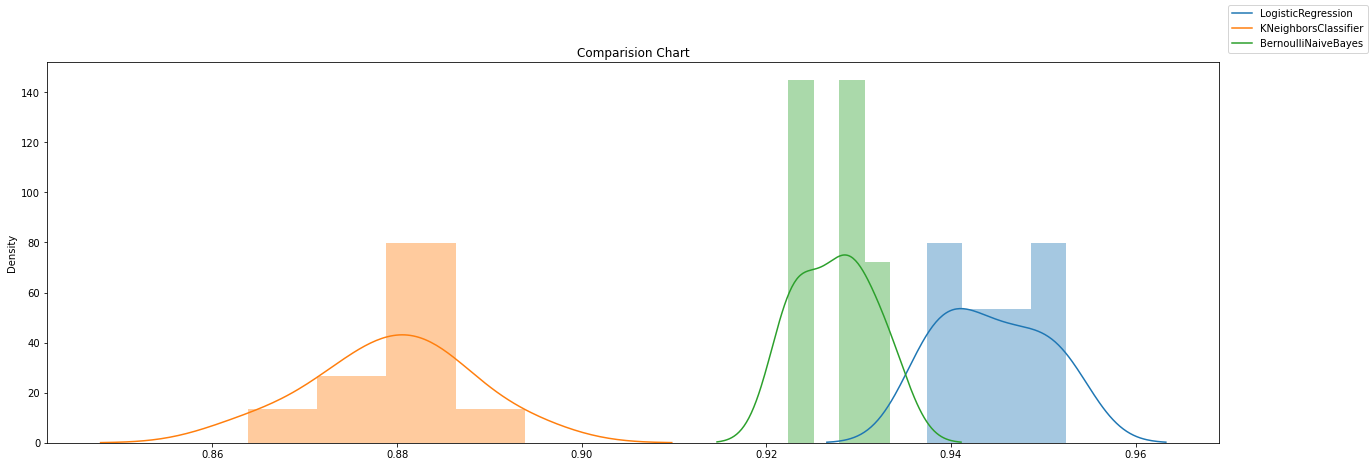

In [ ]:
#-------------------------------- With Parallel processing ---------------------------------------------------
# Parallelizing using Pool.apply()
from IPython.display import clear_output
import multiprocessing as mp
import time
start_time = time.time()

pool = mp.Pool(mp.cpu_count())
compare = CompareModels()
models_result_list = []

def collect_result(result):
    global models_result_list
    if len(models_result_list) != 0:
        clear_output(wait=True)
        compare.compare_displot(models_result_list)
    models_result_list.append(result)

for n, c in zip(classifier_name_list,classifier_list):
    pool.apply_async(CreateModel, args=(X1 , y1, c,n,10), callback=collect_result)


pool.close()  
pool.join() 
print("%s seconds to complete all processes." % (time.time() - start_time))

# 7. Visualize Model performance

In [ ]:
compare.compare_all(models_result_list)

# 8. Implementing My 2 Layer Algorithm Approach

In [11]:
# importing all desired machine learning algorithm to make an hybrid model
clsfrs = Import_classifiers()
clsfrs.set_multiple_classifers("lr","svm","rf","dt","nb","knn") #,"multi_nb" ,"ab","mlp"
#print(clsfrs.multiple_classifiers_list)

#Creating an Meta Classifier
meta_clsfr = Create_meta_classifier('lr')
#print(meta_clsfr.meta_classifier)

#Inserting clsfrs and meta_clsfr objects to create StackingClassifier()  object
my_model = CreateMyModel(clsfrs, meta_clsfr)

#Accessing StackingClassifier() variable.. Here (.model) is variable storing StackingClassifier() object
my_model = my_model.model

#createViewModel (Module) => CreateModel() (Class)
#fiting model with X and Y
my_ml = CreateModel(X1,y1,my_model,"my_model",10)

#appending the final model to list above created, to comparision with other classifiers
models_result_list .append(my_ml)

# 10. Visualizing - Comaprision My model to other traditional models

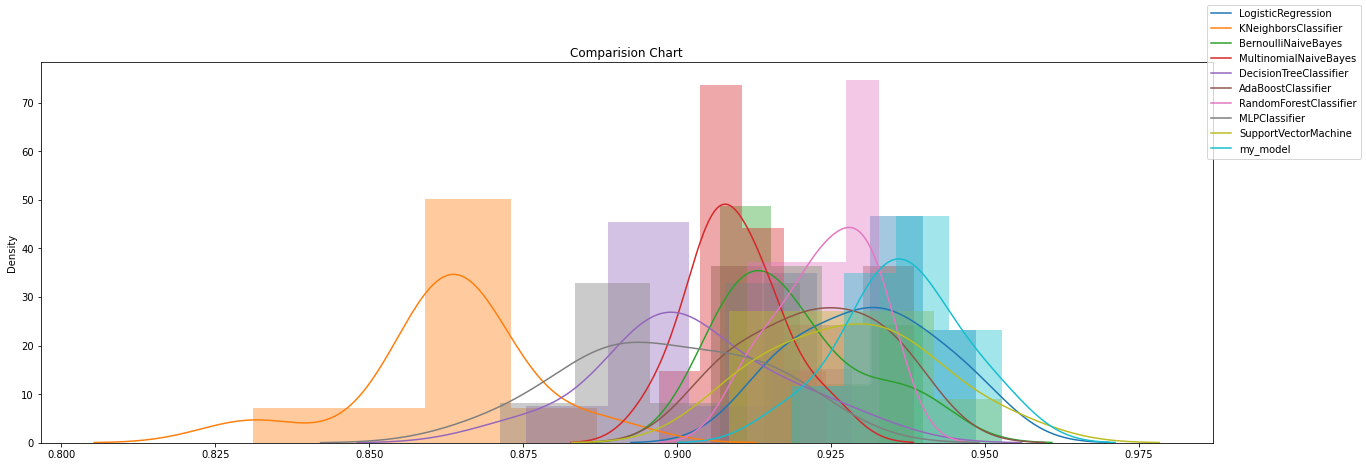

In [12]:
# Creating compare object
#compare = CompareModels()
compare.compare_displot(models_result_list)

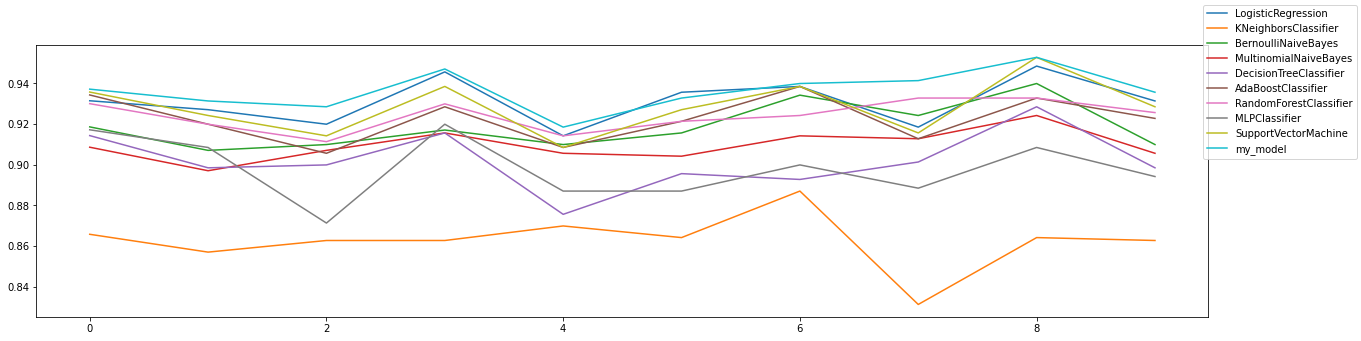

In [13]:
compare.compare_plot(models_result_list)

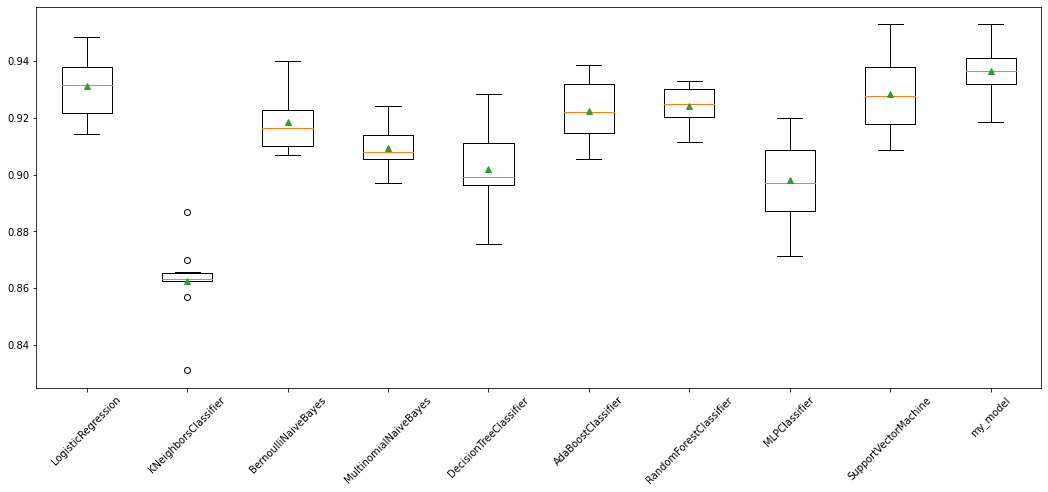

In [14]:
compare.compare_boxplot(models_result_list)

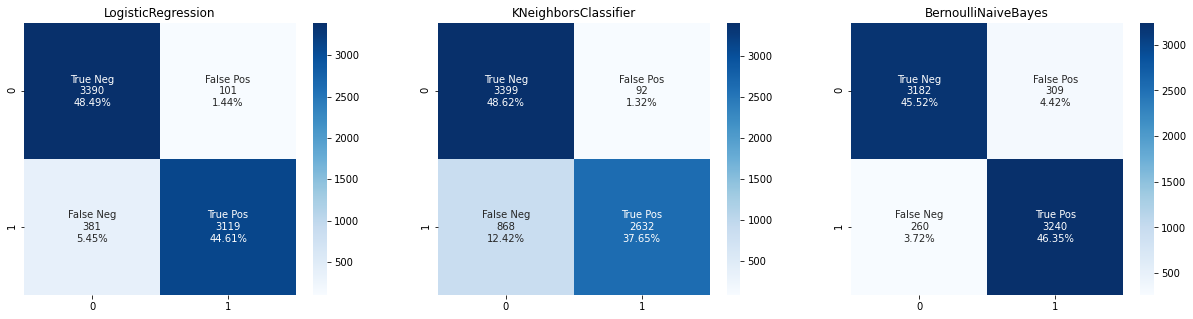

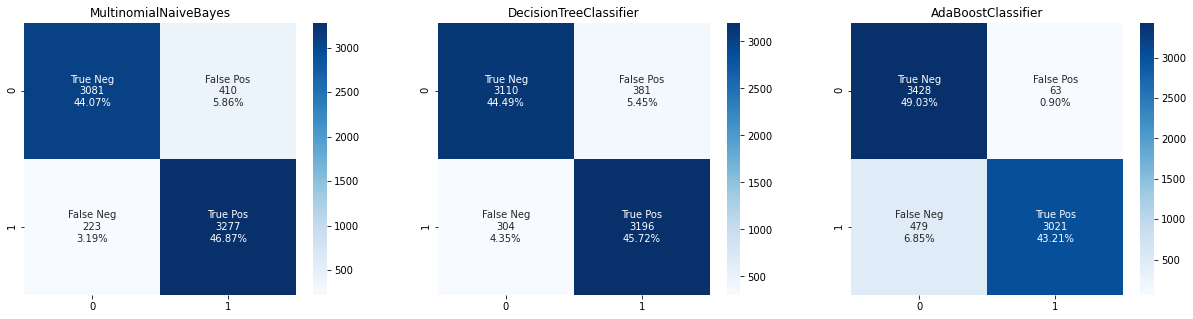

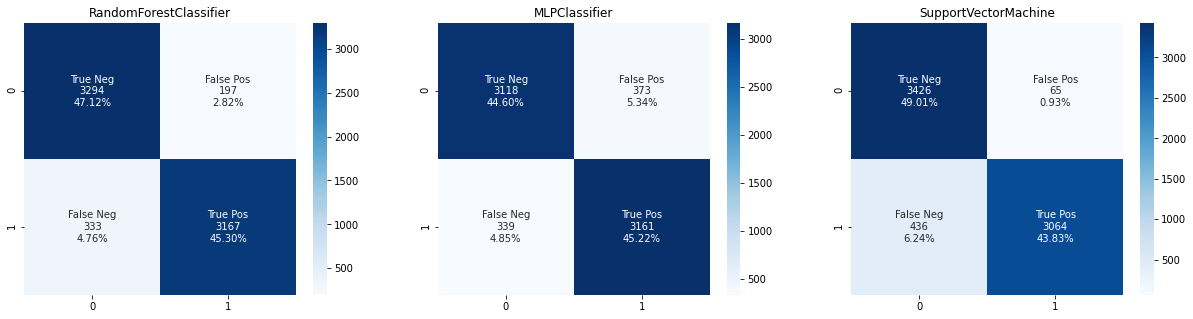

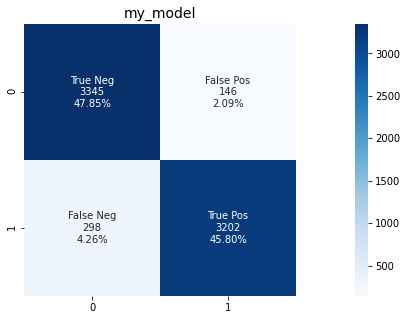

In [15]:
#It displays in one row only, so break the list to make clear list of confusion matrix
compare.compare_confusion_matrix(models_result_list[0:3])
compare.compare_confusion_matrix(models_result_list[3:6])
compare.compare_confusion_matrix(models_result_list[6:9])
compare.compare_confusion_matrix(models_result_list[9])

# Table view of My model's Performance

In [16]:
compare.compare_measures(models_result_list)

╒════╤════════════════════════╤═════════════════╤══════════════╤════════════════╤═══════════════╕
│    │ Model_Name             │   Precision (%) │   Recall (%) │   Accuracy (%) │   F_score (%) │
╞════╪════════════════════════╪═════════════════╪══════════════╪════════════════╪═══════════════╡
│  0 │ LogisticRegression     │         96.8634 │      89.1143 │        93.1054 │       92.8274 │
├────┼────────────────────────┼─────────────────┼──────────────┼────────────────┼───────────────┤
│  1 │ KNeighborsClassifier   │         96.6226 │      75.2    │        86.2681 │       84.5758 │
├────┼────────────────────────┼─────────────────┼──────────────┼────────────────┼───────────────┤
│  2 │ BernoulliNaiveBayes    │         91.2933 │      92.5714 │        91.861  │       91.9279 │
├────┼────────────────────────┼─────────────────┼──────────────┼────────────────┼───────────────┤
│  3 │ MultinomialNaiveBayes  │         88.8798 │      93.6286 │        90.9455 │       91.1924 │
├────┼──────────────

In [17]:
mp.cpu_count()

4